# Bank Customer Churn Prediction

## Problem Statement
Customer churn, or the loss of clients, is a critical concern for banks, as retaining customers is often more cost-effective than acquiring new ones. The objective of this analysis is to develop a predictive model to identify bank customers likely to leave based on their profile and behavioral data. By proactively identifying these customers, banks can implement targeted retention strategies to reduce churn and improve customer satisfaction.

## Data Description

The dataset used in this analysis, Churn_Modelling.csv, contains information about 10,000 bank customers. The key attributes include demographic information, financial behavior, and engagement indicators. Here are the main columnsYes, 0: No): Yes, 0: No)

## Feature	Description

customer_id: Unique identifier for each customer
credit_score: Credit score of the customer
country:Customer’s country of residence
gender: Customer’s gender
age: Customer’s age
tenure: Number of years the customer has been with the bank
balance: Account balance of the customer
products_number: Number of products used by the customer
credit_card: Whether the customer has a credit card (1: Yes, 0: No)
active_member: Whether the customer is an active member (1: Yes, 0: No)
estimated_salary: Estimated annual salary of the customer
churn: Target variable indicating if the customer churned (1: Yes, 0: No

### Step 1: Load the Dataset

We'll first load the dataset from the provided Excel file.

In [8]:
# Install & Import Necessary Libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [9]:
#Read the Data from the CSV File

df= pd.read_csv("C:\\Users\\ACER\\Desktop\\Bank Customer Churn Prediction.csv")


In [10]:
# Display first few rows

print("Dataset Preview:")
print(df.head())

Dataset Preview:
   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  


#### Basic information from 

In [12]:
# information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [13]:
# returns description of the data 

df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [14]:
# Check for missing values

df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [15]:
# Drop unnecessary columns (e.g., customer_id)

df.drop(columns=['customer_id'], inplace=True)

In [16]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
# Data Distribution
# Differentiating Data Columns

print("\nUnique Values in Categorical Columns")
numerical_cols = ['age', 'credit_score',  'balance', 'estimated_salary']
categorical_cols = ['country' , 'gender', 'tenure', 'products_number', 'active_member']
target_col = 'churn'
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")


Unique Values in Categorical Columns
country: 3 unique values
gender: 2 unique values
tenure: 11 unique values
products_number: 4 unique values
active_member: 2 unique values


In [18]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# EDA
---

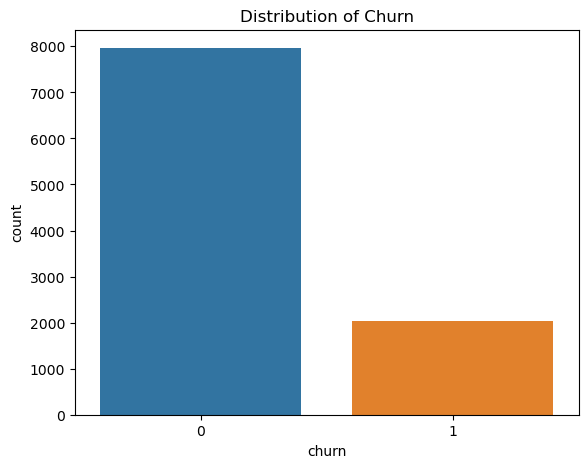

In [20]:
#Counting The Churn of Customer
plt.figure(figsize= (6.5,5))
sns.countplot(data= df , x= 'churn')
plt.title("Distribution of Churn")
plt.show()

* Not Churned Customer are more then Churned Customer.

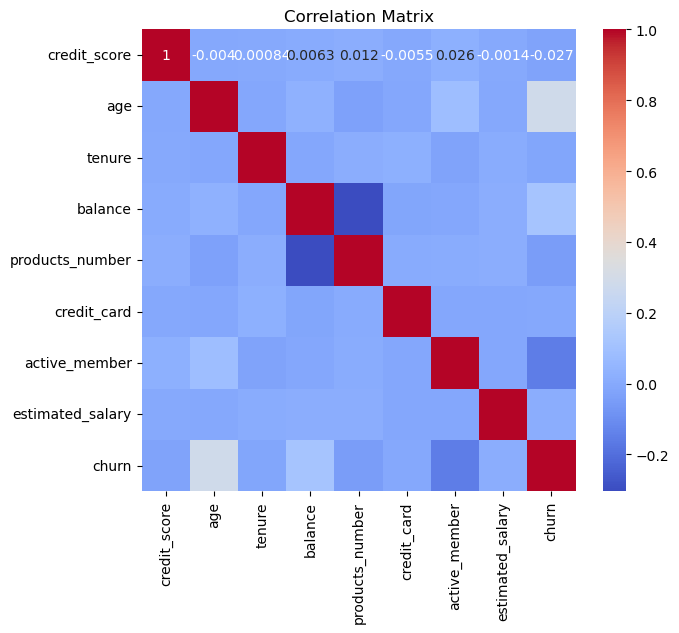

In [22]:
# 1. Correlation Heatmap
plt.figure(figsize=(7,6))
correlation_matrix=df.select_dtypes(['float64','int64']).corr()
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm',linewidths=0)
plt.title('Correlation Matrix')
plt.show()

* Negative Correlation: Features like credit_score or active_member are likely negatively correlated with churn, meaning customers with lower credit scores or inactive accounts tend to churn more.
* Positive Correlation: Features such as age or balance might positively correlate with churn, indicating older customers or those with higher balances might be leaving.

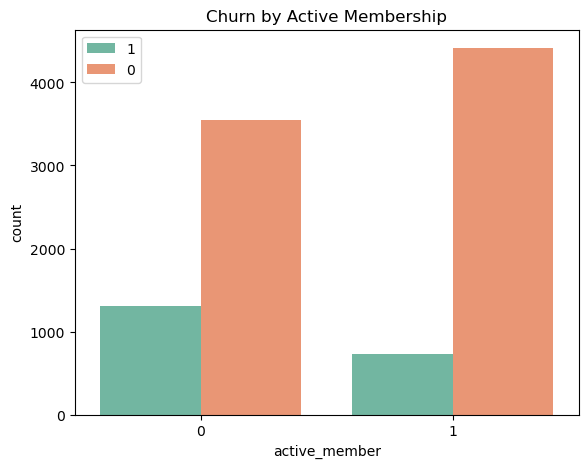

In [24]:
# 2. Churn by Active Membership
df['churn'] = df['churn'].astype(str)
plt.figure(figsize=(6.5,5))
sns.countplot(data=df, x='active_member', hue='churn', palette='Set2')
plt.title('Churn by Active Membership')
plt.legend()
plt.show()

* Inactive Membership: Customers flagged as inactive (active_member = 0) may feel disconnected from the bank and are more likely to churn.

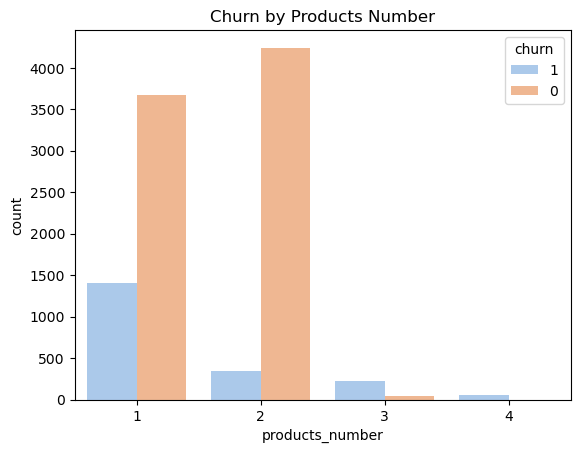

In [26]:
# 3. Churn by Products Number
sns.countplot(data=df, x='products_number', hue='churn', palette='pastel')
plt.title('Churn by Products Number')
plt.show()

* Low Engagement (Fewer Products): Customers with only 1 product (products_number = 1) may churn because they lack a deeper commitment or relationship with the bank.

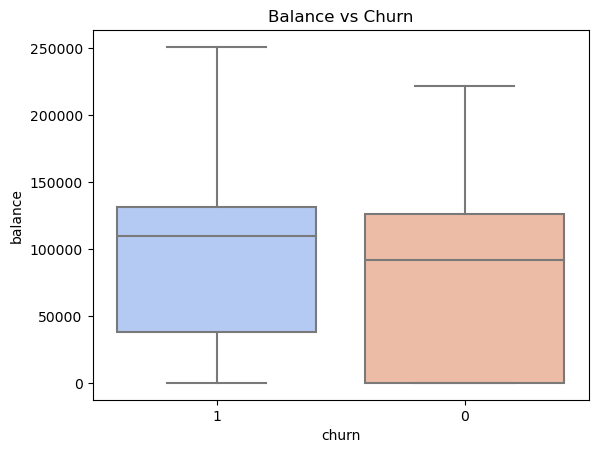

In [28]:
# 4. Balance Distribution for Churned and Retained Customers
sns.boxplot(data=df, x='churn', y='balance', palette='coolwarm')
plt.title('Balance vs Churn')
plt.show()

* High Account Balance: Some customers with significant account balances may churn due to dissatisfaction with returns, fees, or service quality.

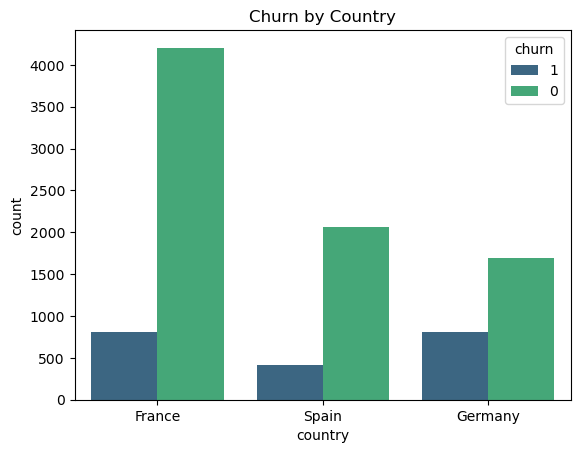

In [30]:
# 5. Churn by Country
sns.countplot(data=df, x='country', hue='churn', palette='viridis')
plt.title('Churn by Country')
plt.show()

* Geographical Influence: The dataset includes customers from multiple countries. Specific trends in country might show higher churn rates, perhaps due to competitive banking services or regional preferences.

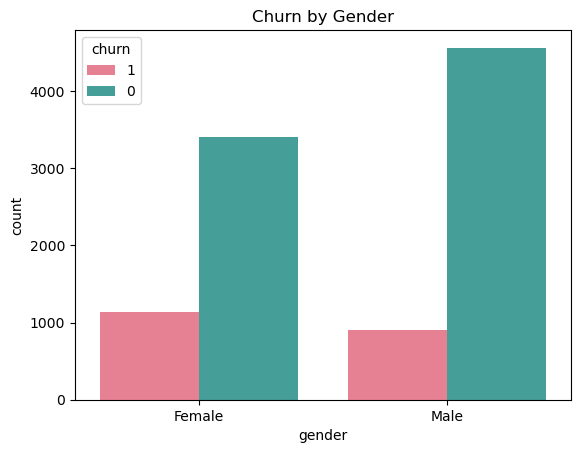

In [32]:
# 6. Churn by Gender
sns.countplot(data=df, x='gender', hue='churn', palette='husl')
plt.title('Churn by Gender')
plt.show()

* Gender Disparity: Analysis of churn by gender (gender) might reveal behavioral differences. For example, one gender might exhibit higher churn rates due to unmet service expectations.

C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


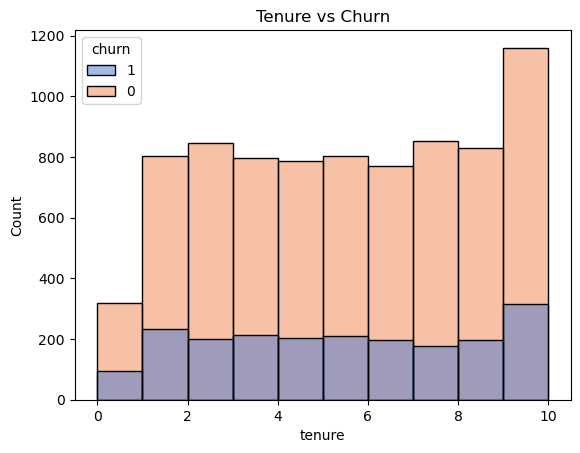

In [34]:
# 7. Churn by Tenure

sns.histplot(data=df, x='tenure', hue='churn', bins=10, kde=False, palette='muted')
plt.title('Tenure vs Churn')
plt.show()

* Tenure and Churn: Customers with shorter tenures might churn more frequently due to a lack of loyalty or dissatisfaction during their initial experience.

In [36]:
# Encode categorical variables

le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['country'] = le.fit_transform(df['country'])
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [37]:
y = df["churn"]
x = df.drop(["churn"],axis=1)

In [38]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: churn, dtype: object

In [39]:
x.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [40]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42, stratify=y)

In [41]:
# Feature scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [42]:
x_train

array([[ 1.058568  , -0.90593285,  0.90750738, ...,  0.64104192,
        -1.030206  ,  1.04208392],
       [ 0.91362605,  0.30016846,  0.90750738, ...,  0.64104192,
        -1.030206  , -0.62355635],
       [ 1.07927399,  0.30016846, -1.10191942, ...,  0.64104192,
         0.97067965,  0.30812779],
       ...,
       [ 0.16821031, -0.90593285, -1.10191942, ...,  0.64104192,
         0.97067965, -0.55808767],
       [ 0.37527024,  1.50626978,  0.90750738, ...,  0.64104192,
        -1.030206  , -1.35149956],
       [ 1.56586482,  1.50626978,  0.90750738, ..., -1.55996038,
         0.97067965, -1.02692216]])

In [43]:
x_test

array([[-0.68073539, -0.90593285,  0.90750738, ...,  0.64104192,
        -1.030206  , -0.09502138],
       [-1.30191518,  0.30016846,  0.90750738, ..., -1.55996038,
        -1.030206  , -0.778941  ],
       [-0.97061929,  1.50626978, -1.10191942, ..., -1.55996038,
         0.97067965,  0.09946914],
       ...,
       [-1.39509214,  0.30016846, -1.10191942, ..., -1.55996038,
        -1.030206  ,  0.8700859 ],
       [ 0.39597623, -0.90593285,  0.90750738, ..., -1.55996038,
        -1.030206  , -1.47935555],
       [ 1.02750901, -0.90593285,  0.90750738, ...,  0.64104192,
        -1.030206  , -0.49531855]])

## Model Training

In [45]:
# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [46]:
#List of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

In [47]:
# Train and evaluate each model
results = {}


## Model Evaluation

In [49]:
for model_name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)
    # Predict on the test set
    y_pred = model.predict(x_test)
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Model: Logistic Regression
Accuracy: 0.8050
Confusion Matrix:
[[1552   41]
 [ 349   58]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.14      0.23       407

    accuracy                           0.81      2000
   macro avg       0.70      0.56      0.56      2000
weighted avg       0.77      0.81      0.75      2000

--------------------------------------------------
Model: Decision Tree
Accuracy: 0.7755
Confusion Matrix:
[[1357  236]
 [ 213  194]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1593
           1       0.45      0.48      0.46       407

    accuracy                           0.78      2000
   macro avg       0.66      0.66      0.66      2000
weighted avg       0.78      0.78      0.78      2000

--------------------------------------------------
Model: Random Forest
Accur

In [50]:
# Display model comparison
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)

print("\nModel Comparison:")
print(results_df)


Model Comparison:
                    Model  Accuracy
5       Gradient Boosting    0.8675
2           Random Forest    0.8645
3  Support Vector Machine    0.8560
4     K-Nearest Neighbors    0.8350
0     Logistic Regression    0.8050
1           Decision Tree    0.7755


## Feature Importance


In [52]:
importances = model.feature_importances_
features = x.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:\n", feature_importance_df)

Feature Importance:
             Feature  Importance
3               age    0.395465
6   products_number    0.312571
8     active_member    0.117346
5           balance    0.077374
1           country    0.040718
9  estimated_salary    0.018192
0      credit_score    0.018150
2            gender    0.014749
4            tenure    0.004731
7       credit_card    0.000702


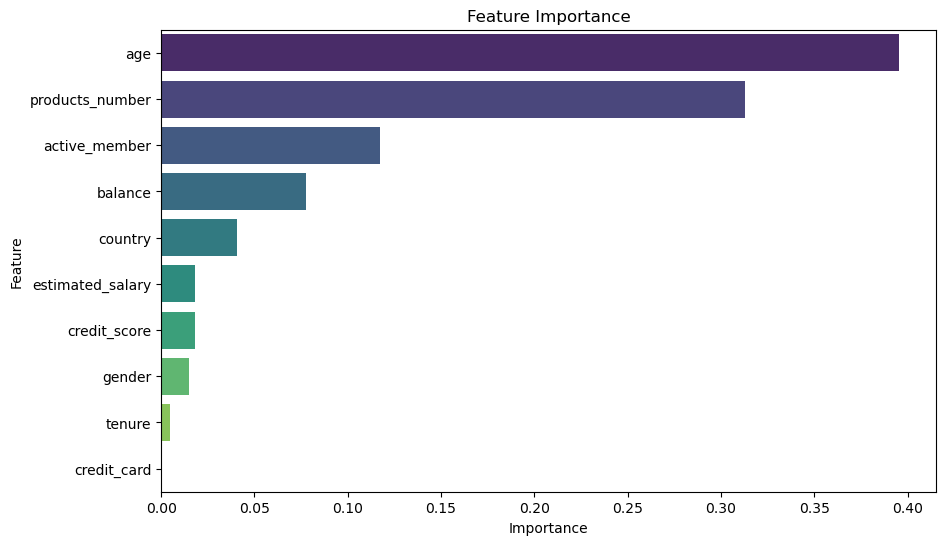

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance')
plt.show()